# Loan-Approval-Prediction-Dataset  
## EDA y Pipelines de Preprocesamiento

---

## Introducción

En el presente notebook se realizará un **análisis exploratorio de datos (EDA)**. Posteriormente, se generarán **pipelines de preprocesamiento** para los datos y, finalmente, se entrenará un **modelo de Machine Learning** para predecir la etiqueta de salida.

El conjunto de datos **Loan-Approval-Prediction-Dataset** es una colección de registros financieros e información asociada que se utiliza para determinar la elegibilidad de individuos u organizaciones para obtener préstamos de una institución crediticia. Incluye diversos factores como:

- Puntaje CIBIL  
- Ingresos  
- Estado laboral  
- Plazo del préstamo  
- Monto del préstamo  
- Valor de los activos  
- Estado del préstamo  

El dataset fue obtenido desde Kaggle y puede consultarse en el siguiente enlace: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

En este caso, se espera generar un modelo capaz de **predecir si un préstamo será aprobado o no** en función de las características proporcionadas en el conjunto de datos.

In [321]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [322]:
data = pd.read_csv('./data/loan_approval_dataset.csv')

# Eliminar espacios vacios al inicio de los nombres de las columnas
data.columns = data.columns.str.strip() 
data['loan_status'] = data['loan_status'].str.strip()
data['education'] = data['education'].str.strip()
data['self_employed'] = data['self_employed'].str.strip()

# Cambiar a ceros y unos manualmente la columna objetivo para asegurar que Approved sea uno
data['loan_status'] = data['loan_status'].map({
    'Rejected': 0,
    'Approved': 1
})

data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


## EDA

In [323]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   str  
 3   self_employed             4269 non-null   str  
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(11), str(2)
memory usage: 433.7 KB


In [324]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


A partir de los datos visualizados en las tablas anteriores, se obtiene lo siguiente respecto al conjunto de datos:

### Columnas y tipos de datos

- **loan_id**: entero, identificador  
- **no_of_dependents**: entero, numérica  
- **education**: cadena (`Graduate`, `Not Graduate`), categórica  
- **self_employed**: cadena (`No`, `Yes`), categórica  
- **income_annum**: entero, numérica  
- **loan_amount**: entero, numérica  
- **loan_term**: entero, numérica  
- **cibil_score**: entero, numérica  
- **residential_assets_value**: entero, numérica  
- **commercial_assets_value**: entero, numérica  
- **luxury_assets_value**: entero, numérica  
- **bank_asset_value**: entero, numérica  
- **loan_status**: cadena (`Rejected`, `Approved`), categórica  

### Observaciones

Se concluye que la única columna que no se utilizará será **loan_id**, debido a que es una columna de identificador. Esto implica que cada entrada es diferente y no aporta información relevante para el modelo.

Además, se observa que no existen valores faltantes en ninguna columna, ya que todas cuentan con el mismo número de registros, el cual coincide con el total de filas del conjunto de datos (**4269**).

In [325]:
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
categorical_cols = ['education', 'self_employed']
target = 'loan_status'

numerical_cols, categorical_cols

(['no_of_dependents',
  'income_annum',
  'loan_amount',
  'loan_term',
  'cibil_score',
  'residential_assets_value',
  'commercial_assets_value',
  'luxury_assets_value',
  'bank_asset_value'],
 ['education', 'self_employed'])

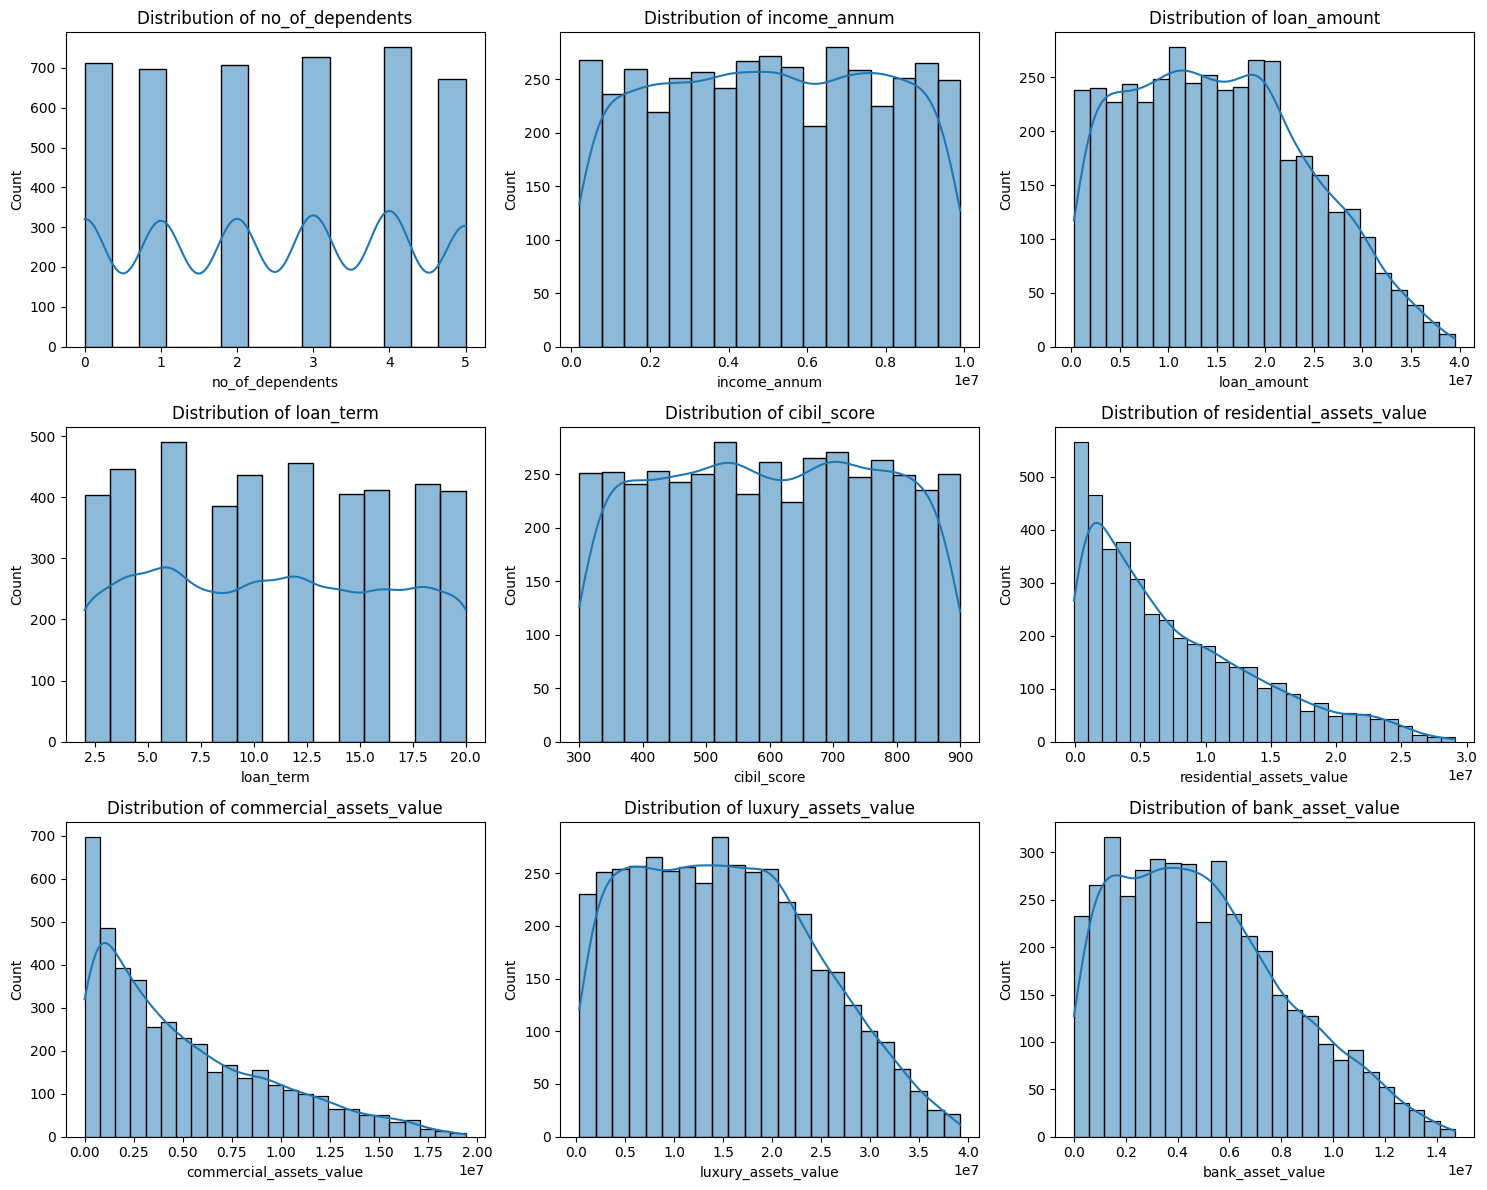

In [326]:
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axs = axs.ravel()

for ax, col in zip(axs, numerical_cols):
    sns.histplot(data=data, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# Remove unused subplots
for ax in axs[len(numerical_cols):]:
    ax.remove()

fig.tight_layout()

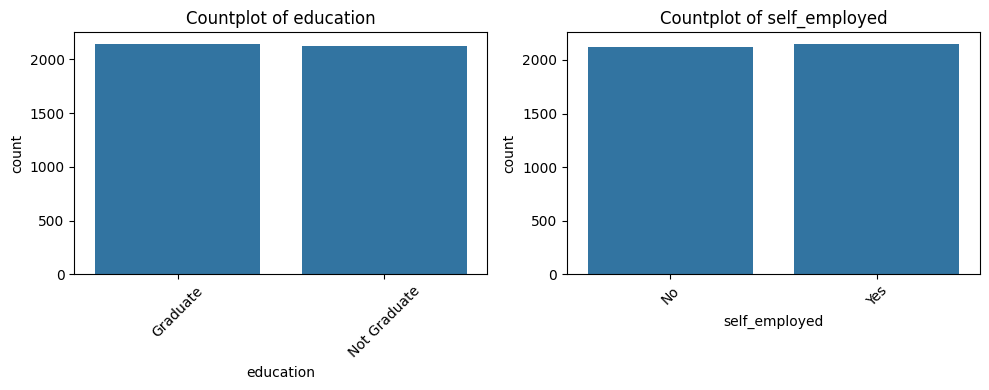

In [327]:
fig, axs = plt.subplots(1, len(categorical_cols), figsize=(10, 4))

if len(categorical_cols) == 1:
    axs = [axs]

for ax, col in zip(axs, categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()

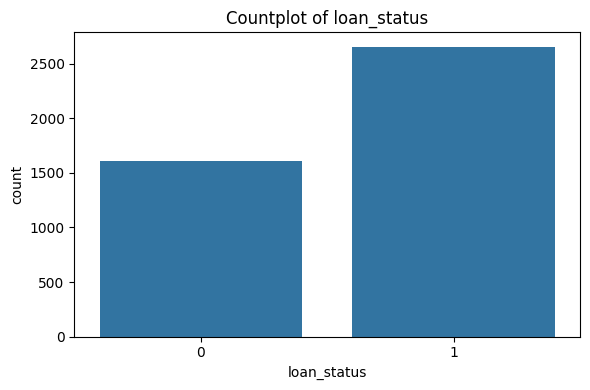

In [328]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='loan_status')
plt.title('Countplot of loan_status')
plt.tight_layout()

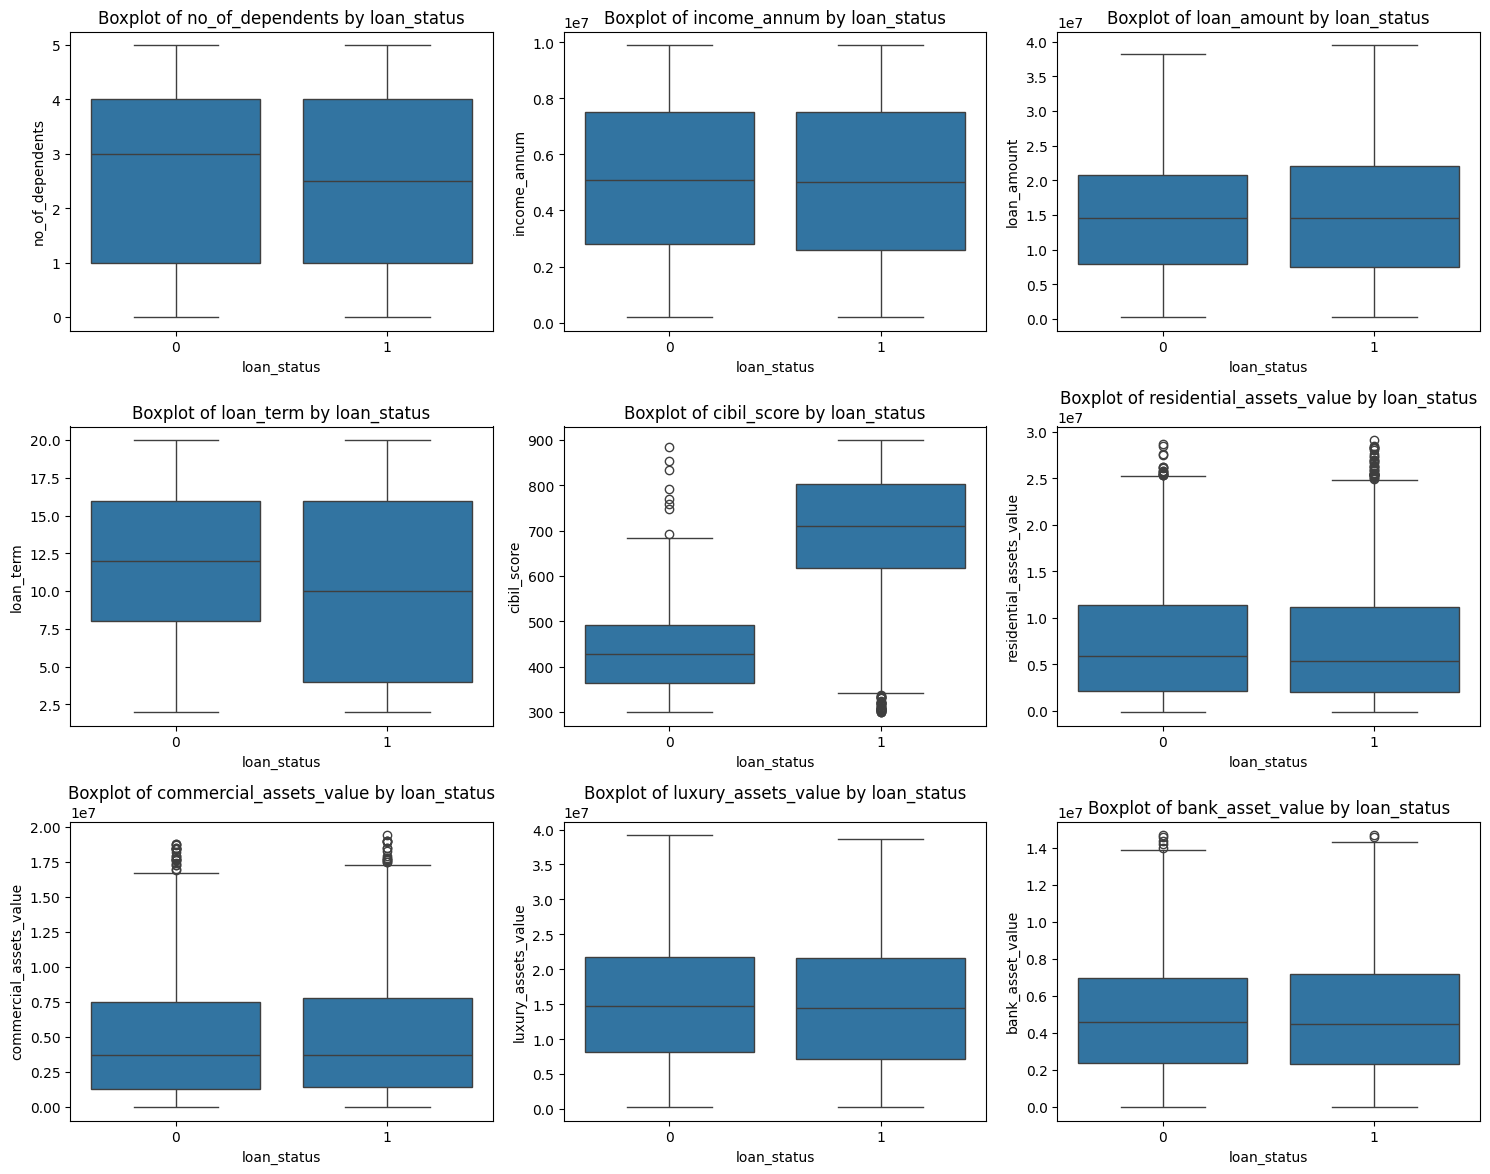

In [329]:
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axs = axs.ravel()

for ax, col in zip(axs, numerical_cols):
    sns.boxplot(data=data, x='loan_status', y=col, ax=ax)
    ax.set_title(f'Boxplot of {col} by loan_status')

for ax in axs[len(numerical_cols):]:
    ax.remove()

fig.tight_layout()

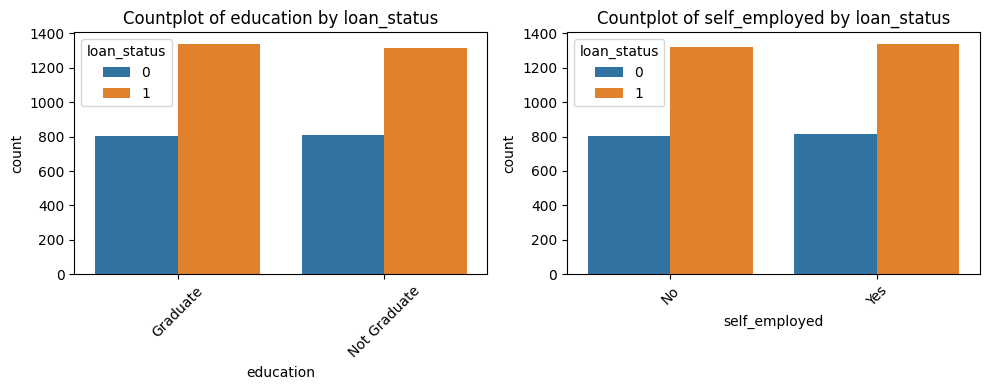

In [330]:
fig, axs = plt.subplots(1, len(categorical_cols), figsize=(10, 4))

if len(categorical_cols) == 1:
    axs = [axs]

for ax, col in zip(axs, categorical_cols):
    sns.countplot(data=data, x=col, hue='loan_status', ax=ax)
    ax.set_title(f'Countplot of {col} by loan_status')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()

<Axes: >

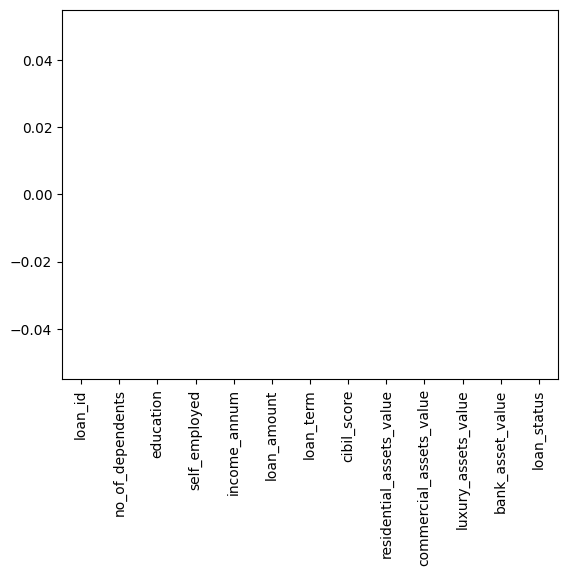

In [331]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

In [332]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

loan_id                     0.0
no_of_dependents            0.0
education                   0.0
self_employed               0.0
income_annum                0.0
loan_amount                 0.0
loan_term                   0.0
cibil_score                 0.0
residential_assets_value    0.0
commercial_assets_value     0.0
luxury_assets_value         0.0
bank_asset_value            0.0
loan_status                 0.0
dtype: float64

### Resultados del Análisis Exploratorio de Datos (EDA)

A partir de la visualización y exploración de las características numéricas del conjunto de datos, se identificó una diferencia significativa en las escalas de las variables. Por ejemplo, las columnas `no_of_dependents` y `loan_term` presentan valores relativamente pequeños (menores a 20), mientras que otras variables, como aquellas relacionadas con el valor de activos (`residential_assets_value`, `commercial_assets_value`, `luxury_assets_value`, `bank_asset_value`), manejan escalas que alcanzan valores de millones.

Debido a estas diferencias, se decidió aplicar **escalamiento (normalización/estandarización)** a todas las variables numéricas, con el objetivo de que compartan una escala comparable y evitar que aquellas con valores grandes dominen el proceso de entrenamiento del modelo.

Adicionalmente, se observó que varias columnas numéricas presentan **distribuciones asimétricas** y se alejan considerablemente de una distribución normal de Gauss. En particular, las columnas:

- `no_of_dependents`
- `loan_term`
- `commercial_assets_value`
- `luxury_assets_value`
- `loan_amount`
- `residential_assets_value`
- `bank_asset_value`

presentan sesgos pronunciados. Por esta razón, se aplicará una **Power Transformation** a estas variables con el fin de reducir la asimetría y aproximar sus distribuciones a una forma más gaussiana.

En cuanto a las **variables categóricas**, se identificaron dos columnas: `education` y `self_employed`. Ambas corresponden a variables binarias, y el análisis de frecuencia mostró que sus clases se encuentran razonablemente balanceadas, con proporciones cercanas al 50% para cada categoría. Dado que estas variables no poseen un orden intrínseco, se utilizará **One-Hot Encoding** para transformarlas en un formato numérico adecuado para el modelo de *machine learning*.

Respecto a la **variable objetivo** (`loan_status`), se detectó un **desbalance moderado de clases**, donde los préstamos con estado *Approved* son notablemente más frecuentes que aquellos clasificados como *Rejected, lo cual puede tener un impato en el desempeño del modelo.

Al comparar la distribución de las variables numéricas entre préstamos aprobados y rechazados, se observó que la mayoría de las columnas presentan distribuciones muy similares entre ambas clases. Sin embargo, la columna `cibil_score` mostró una diferencia clara entre aprobados y rechazados, lo que sugiere que esta característica podría ser especialmente relevante para la predicción del estado del préstamo.

De manera similar, el análisis de las variables categóricas indicó que, independientemente de la categoría (`education` o `self_employed`), la mayoría de los registros corresponden a préstamos aprobados, lo cual es consistente con el desbalance observado en la variable objetivo.

Finalmente, a través de las visualizaciones y del análisis de valores faltantes, se confirmó que el conjunto de datos **no contiene valores nulos o faltantes** en ninguna de sus columnas, por lo que no será necesario aplicar técnicas de llenado ni eliminar variables por insuficiencia de datos.

## Pipelines de Preprocesamiento

Con base en los hallazgos obtenidos durante el análisis exploratorio de datos, se diseñó un **pipeline de preprocesamiento** utilizando las herramientas de `sklearn`. El objetivo de este pipeline es aplicar de forma sistemática y reproducible las transformaciones necesarias a cada tipo de variable antes del entrenamiento del modelo.

Para ello, se utiliza `ColumnTransformer`, el cual permite aplicar diferentes transformaciones a distintos subconjuntos de columnas. Cada conjunto de transformaciones se define como un pipeline independiente mediante `make_pipeline`.

### Transformaciones aplicadas

**Variables categóricas (`education`, `self_employed`)**  
Se aplica **One-Hot Encoding** para convertir las categorías binarias en variables numéricas, permitiendo su uso en el modelo de *machine learning*.

**Variables numéricas con distribuciones asimétricas**  
A las columnas:

- `no_of_dependents`
- `loan_term`
- `commercial_assets_value`
- `luxury_assets_value`
- `loan_amount`
- `residential_assets_value`
- `bank_asset_value`

se les aplica **Power Transformation**, seguida de **Standard Scaling**, con el fin de reducir el sesgo y estandarizar sus escalas.

**Resto de variables numéricas**  
Las columnas numéricas restantes se escalan directamente mediante `StandardScaler`, asegurando que todas las variables numéricas tengan **media cero y varianza unitaria**.

Dado que el conjunto de datos no contiene valores faltantes, **no se incluyen transformaciones para llenar entradas o eliminar columnas** dentro del pipeline.

In [333]:
preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            (
                'cat',
                OneHotEncoder(handle_unknown='ignore'),
                categorical_cols
            ),
            (
                'num_power',
                make_pipeline(
                    PowerTransformer(),
                    StandardScaler()
                ),
                [
                    'no_of_dependents',
                    'loan_term',
                    'commercial_assets_value',
                    'luxury_assets_value',
                    'loan_amount',
                    'residential_assets_value',
                    'bank_asset_value'
                ]
            ),
            (
                'num',
                StandardScaler(),
                [
                    'income_annum',
                    'cibil_score'
                ]
            )
        ],
        remainder='passthrough',
    )
)

## Partición y Procesamiento del Conjunto de Datos

In [334]:
x = data[numerical_cols + categorical_cols] 
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

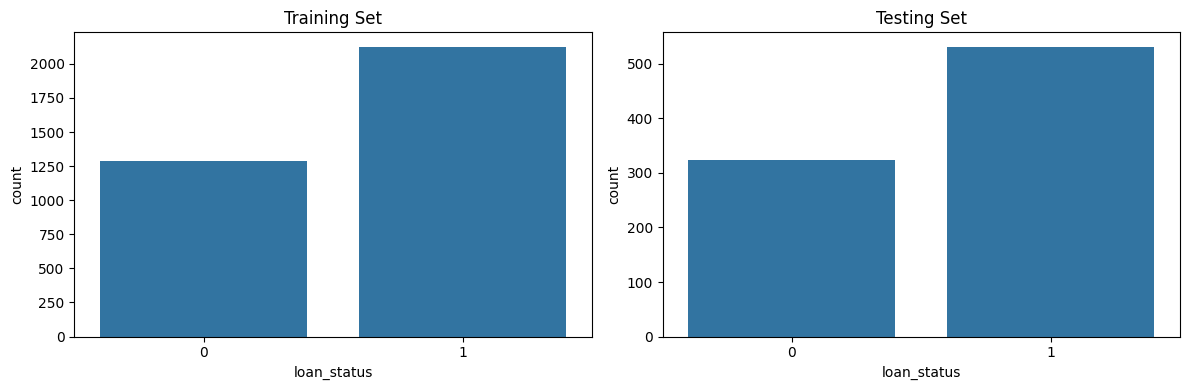

In [335]:
# Verificar la distribución de las clases en los conjuntos de entrenamiento y prueba

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Testing Set')
fig.tight_layout()

In [336]:
x_train_processed = preprocessing_pipeline.fit_transform(x_train, y_train)
x_train_processed

array([[ 1.        ,  0.        ,  1.        , ..., -0.61827541,
        -0.09264606,  1.13110216],
       [ 1.        ,  0.        ,  0.        , ..., -0.21987958,
         0.26545952,  0.19424506],
       [ 1.        ,  0.        ,  0.        , ...,  0.78194444,
         1.08910236,  0.79568419],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.25344727,
         0.08640673, -0.11225757],
       [ 1.        ,  0.        ,  1.        , ...,  0.50860254,
        -0.23588829, -1.4481464 ],
       [ 1.        ,  0.        ,  1.        , ...,  1.73094389,
         1.33977627, -0.67321522]], shape=(3415, 13))

In [337]:
x_test_processed = preprocessing_pipeline.transform(x_test)
x_test_processed

array([[ 0.        ,  1.        ,  0.        , ...,  0.48261338,
         1.16072348,  0.43135087],
       [ 0.        ,  1.        ,  0.        , ..., -0.4286111 ,
        -0.70142554, -1.10694536],
       [ 1.        ,  0.        ,  1.        , ...,  0.45641441,
         1.0532918 , -0.55177078],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.6850506 ,
        -0.12845661, -1.61007232],
       [ 1.        ,  0.        ,  1.        , ..., -1.86169094,
        -1.70412117, -1.73151676],
       [ 1.        ,  0.        ,  0.        , ...,  0.6850506 ,
         1.01748124, -1.15899298]], shape=(854, 13))

## Creación del Modelo

In [338]:
classification_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression()
)

classification_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthroug

In [339]:
# Entrenamiento del modelo

classification_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthroug

In [340]:
# Prueba del modelo

y_test_pred = classification_model.predict(x_test)
y_test_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [341]:
# Comparar resultados predichos con los reales

x_test['loan_status_Predicted'] = y_test_pred
x_test['loan_status_Actual'] = y_test.values
x_test

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status_Predicted,loan_status_Actual
2856,3,8300000,31400000,6,674,1000000,1600000,17200000,6100000,Not Graduate,Yes,1,0
3176,4,3100000,8200000,18,408,2900000,3800000,10800000,3100000,Not Graduate,Yes,0,0
477,1,8000000,31900000,12,504,23800000,1500000,22100000,6000000,Graduate,No,1,0
4023,0,3800000,13300000,6,655,9600000,0,8600000,2600000,Not Graduate,No,1,1
134,3,1500000,5500000,16,717,2100000,800000,4400000,1300000,Not Graduate,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,0,9100000,22200000,6,419,7400000,600000,18200000,9800000,Graduate,No,0,0
2916,3,500000,1700000,4,824,500000,600000,1400000,400000,Not Graduate,Yes,1,1
3688,4,4700000,11000000,4,321,10100000,100000,9600000,6900000,Graduate,Yes,0,0
95,5,300000,1100000,2,300,100000,500000,700000,400000,Graduate,No,0,1


## Evaluación del Modelo

Se evalúan las métricas vistas en clase para evaluar modelos de clasificación (confusion matrix, accuracy, precision, recall, f2 score).

In [342]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

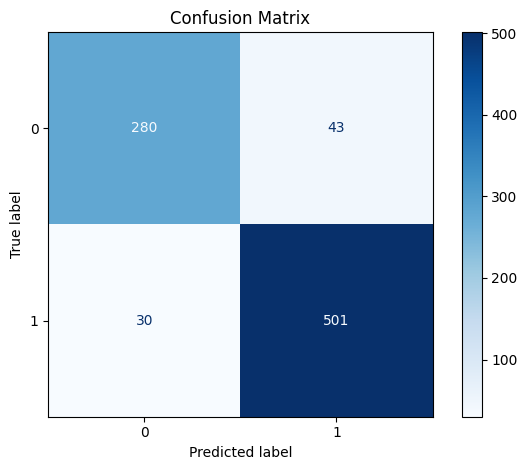

In [343]:
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [344]:
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.914519906323185

In [345]:
precision = precision_score(y_test, y_test_pred, pos_label=1)
precision

0.9209558823529411

In [346]:
recall = recall_score(y_test, y_test_pred, pos_label=1)
recall

0.943502824858757

In [347]:
f1 = f1_score(y_test, y_test_pred, pos_label=1)
f1

0.932093023255814

## Pipeline completo (Preprocesamiento y Modelo)

In [348]:
model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('model', LogisticRegression(max_iter=1000))
])

X = data.drop(columns='loan_status')
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model_pipeline.fit(X_train, y_train)

y_test_pred = model_pipeline.predict(X_test)

y_test_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,